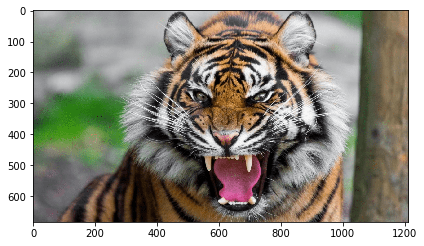

In [39]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

image = io.imread('tiger.png')
io.imshow(image)
io.show()
rows = image.shape[0]
cols = image.shape[1]

In [60]:
ncolor = 64
rimage = image.reshape(image.shape[0]*image.shape[1],3)
kmeans = KMeans(n_clusters = ncolor, max_iter=200)
kmeans.fit(rimage)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=64, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
centers = kmeans.cluster_centers_
labels = np.asarray(kmeans.labels_).reshape(rows, cols)
compressed_image = np.zeros((rows, cols,3),dtype=np.uint8 )
for i in range(rows):
    for j in range(cols):
            compressed_image[i,j,:] = centers[labels[i,j],:]


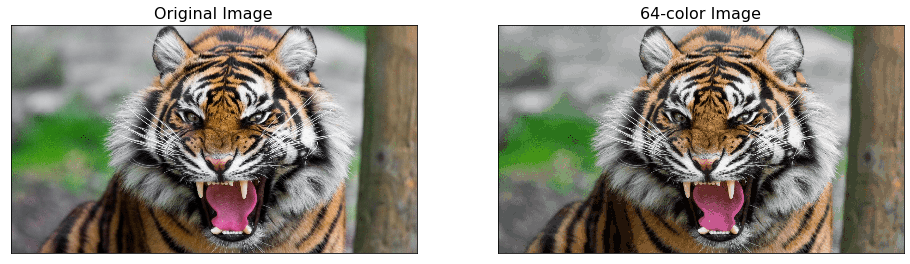

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)

ax[1].imshow(compressed_image)
ax[1].set_title(f'{ncolor}-color Image', size=16);

io.imsave('compressed_tiger.png',compressed_image);